## 1. Iniciando a aplicação


### 2. Top 5 aplicativos por número de instalações

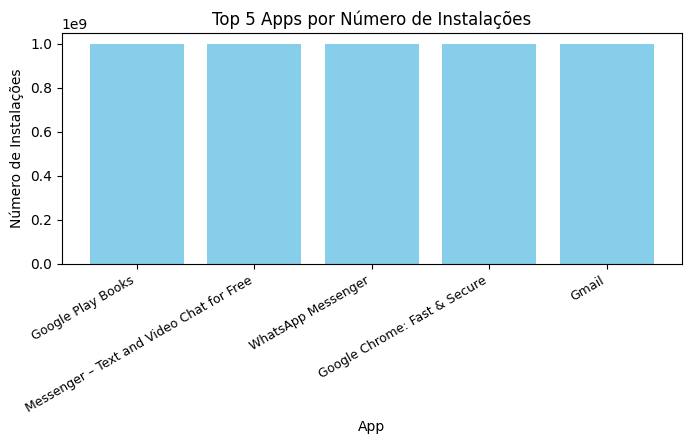

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura do arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remoção de linhas duplicadas
df = df.drop_duplicates(subset='App')

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Top 5 apps por número de instalações
top_5_apps = df.nlargest(5, 'Installs')

# Gráfico de barras dos top 5 apps por número de instalações
plt.figure(figsize=(8, 3))
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='skyblue')
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=30, ha='right',fontsize=9 )
plt.show()


### 3. Mostrando as categorias por frequência


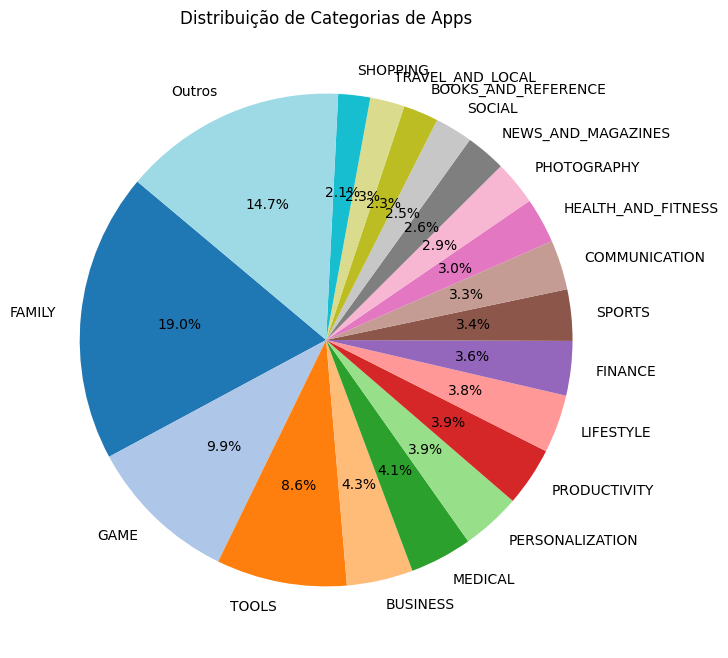

In [12]:
# Remoção de linhas duplicadas
df = df.drop_duplicates(subset='App')

# Calcula a frequência das categorias
category_freq = df['Category'].value_counts()

# Calcula a porcentagem de cada categoria
category_percent = category_freq / category_freq.sum() * 100

# Filtra as categorias que representam menos de 2%
other_threshold = 2
filtered_categories = category_percent[category_percent >= other_threshold]

# Agrupa as categorias que representam menos de 2% sob a categoria 'Outros'
other_category_count = category_percent[category_percent < other_threshold].sum()
filtered_categories['Outros'] = other_category_count

# Cria o gráfico de pizza
plt.figure(figsize=(10, 8))
filtered_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Distribuição de Categorias de Apps')
plt.ylabel('')
plt.show()


### 4. Aplicativo mais caro no dataset

In [16]:
df = pd.read_csv('googleplaystore.csv')

# Conversão da coluna 'Price' para numérica, removendo o símbolo de dólar
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Encontrar o app mais caro
most_expensive_app = df.nlargest(1, 'Price')

# Imprimir o nome do app mais caro e o seu preço
print("App mais caro no dataset:")
print(f"Nome do App: {most_expensive_app['App'].values[0]}")
print(f"Preço: ${most_expensive_app['Price'].values[0]:.2f}")

App mais caro no dataset:
Nome do App: I'm Rich - Trump Edition
Preço: $400.00


### 5. Contagem de aplicativos classificados como Mature 17+

In [13]:
# Contagem de apps classificados como Mature 17+
# Remoção de linhas duplicadas
df = df.drop_duplicates(subset='App')
mature_apps_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print("Número de aplicativos classificados como Mature 17+: ", mature_apps_count)


Número de aplicativos classificados como Mature 17+:  393


### Gráfico da contagem dos aplicativos classificados como 'Mature 17+'

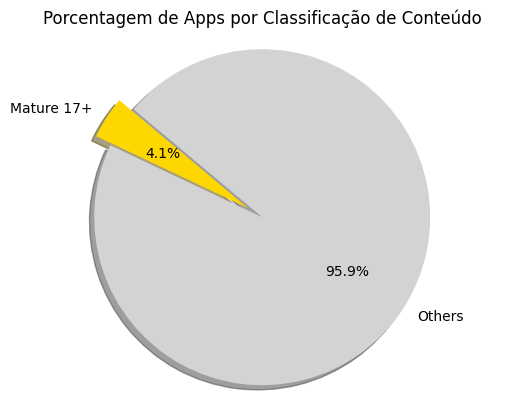

In [8]:
# Contagem de apps classificados como Mature 17+
mature_apps_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]

# criação de gráfico para visualização
labels = ['Mature 17+', 'Others']
sizes = [mature_apps_count, len(df) - mature_apps_count]
colors = ['gold', 'LightGray']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Porcentagem de Apps por Classificação de Conteúdo')
plt.show()


### 6. Top 10 aplicativos com mais reviews

In [6]:
# Remover linhas duplicadas
df = df.drop_duplicates(subset='App')

# Ordenação dos dados pelos aplicativos com mais revisões
top_10_apps_sorted = df.sort_values(by='Reviews', ascending=False).head(10)

print("Aplicativos com mais reviews em ordem decrescente: ")
for i, row in enumerate(top_10_apps_sorted.itertuples(), start=1):
    print(f"{i}. {row.App} - Reviews: {row.Reviews}")

Aplicativos com mais reviews em ordem decrescente: 
1. Facebook - Reviews: 78158306
2. WhatsApp Messenger - Reviews: 69119316
3. Instagram - Reviews: 66577313
4. Messenger – Text and Video Chat for Free - Reviews: 56642847
5. Clash of Clans - Reviews: 44891723
6. Clean Master- Space Cleaner & Antivirus - Reviews: 42916526
7. Subway Surfers - Reviews: 27722264
8. YouTube - Reviews: 25655305
9. Security Master - Antivirus, VPN, AppLock, Booster - Reviews: 24900999
10. Clash Royale - Reviews: 23133508


### 7. Aplicativo pior avaliado

In [245]:
worst_rated_app = df.nsmallest(1, 'Rating')

print("Aplicativo com a Pior Avaliação:")
print(f"Nome do Aplicativo: {worst_rated_app['App'].values[0]}")
print(f"Avaliação: {worst_rated_app['Rating'].values[0]}")


Aplicativo com a Pior Avaliação:
Nome do Aplicativo: House party - live chat
Avaliação: 1.0


### 7. Aplicativos mais leves

In [10]:
# função para converter os tipos
def convert_size_to_mb(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

# encontrando os 10 aplicativos mais leves
top_10_lightest_apps = df.nsmallest(10, 'Size_MB')

print("Top 10 Apps Mais leves:")
for index, row in top_10_lightest_apps.iterrows():
    print(f"{row['App']}: Tamanho - {row['Size_MB']} MB")


Top 10 Apps Mais leves:
Essential Resources: Tamanho - 0.00830078125 MB
Market Update Helper: Tamanho - 0.0107421875 MB
My baby firework (Remove ad): Tamanho - 0.013671875 MB
Ad Remove Plugin for App2SD: Tamanho - 0.0166015625 MB
ExDialer PRO Key: Tamanho - 0.0166015625 MB
Private Dating, Hide App- Blue for PrivacyHider: Tamanho - 0.017578125 MB
Fill 'er Up: Tamanho - 0.017578125 MB
Morse Code Reader: Tamanho - 0.01953125 MB
Plugin:AOT v5.0: Tamanho - 0.0224609375 MB
EM Launcher Pro: Tamanho - 0.0234375 MB


### 8. Gráfico de linhas dos aplicativos mais leves

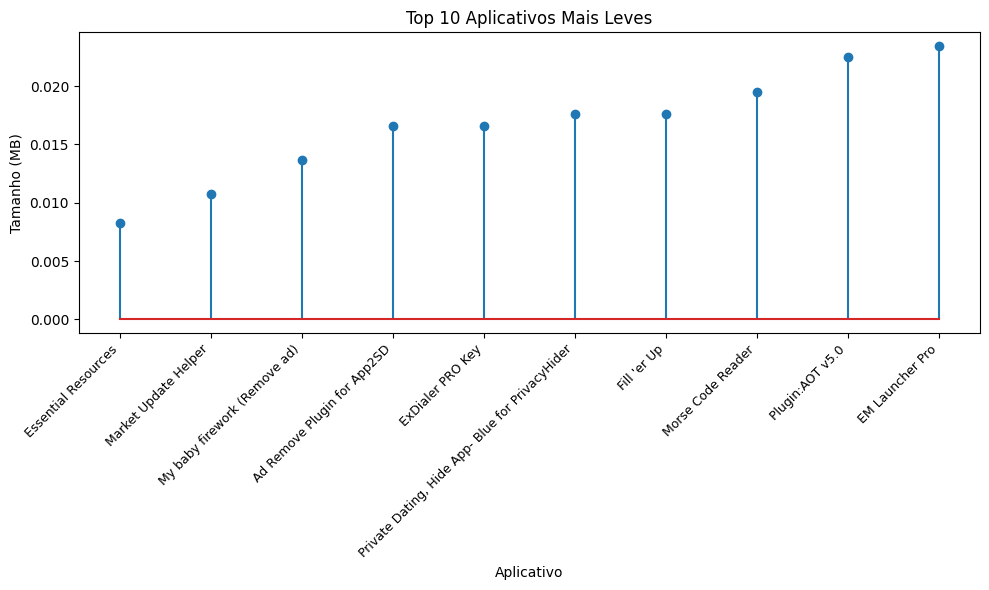

In [14]:
# Função para converter os tamanhos para números em megabytes
def convert_size_to_mb(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'G' in size:
        return float(size.replace('G', '')) * 1024  # Convertendo de gigabytes para megabytes
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

# Selecionando os top 10 apps mais leves
top_10_lightest_apps = df.nsmallest(10, 'Size_MB')

# Criando o gráfico, tipo stem
plt.figure(figsize=(10, 6))
plt.stem(top_10_lightest_apps['App'], top_10_lightest_apps['Size_MB'])
plt.xlabel('Aplicativo')
plt.ylabel('Tamanho (MB)')
plt.title('Top 10 Aplicativos Mais Leves')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()


### 8. Gráfico de dispersão do top 10 aplicativos por número de reviews

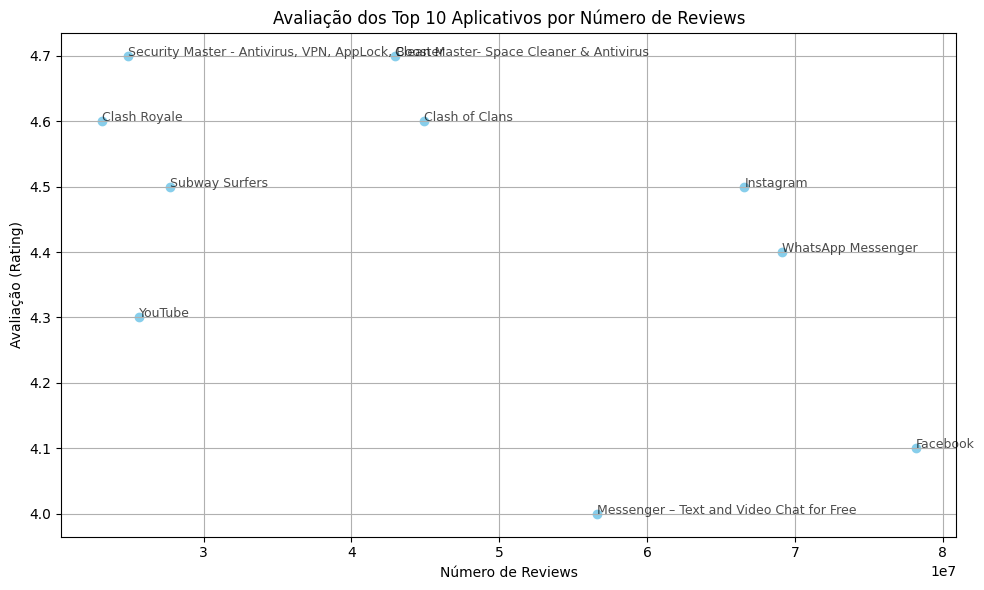

In [12]:
# Ordenação dos dados pelos aplicativos com mais revisões
top_10_apps_sorted = df.sort_values(by='Reviews', ascending=False).head(10)

# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(top_10_apps_sorted['Reviews'], top_10_apps_sorted['Rating'], color='skyblue')
plt.xlabel('Número de Reviews')
plt.ylabel('Avaliação (Rating)')
plt.title('Avaliação dos Top 10 Aplicativos por Número de Reviews')
plt.grid(True)

# Adiciona os nomes dos aplicativos nos pontos do gráfico
for i, row in top_10_apps_sorted.iterrows():
    plt.annotate(row['App'], (row['Reviews'], row['Rating']), fontsize=9, alpha=0.7, rotation=0)

plt.tight_layout()
plt.show()